# HOME ASSIGNMENT #4: DATABASE DESIGN & SQL

**Mục đích của bài Assignment**
> *   Hiểu các bước design Database cho Case study cụ thể: DataCracy
*   Bài tập SQL (Dựa trên Cheatsheet)
*   `[Optional]` Bài tập Python Pandas (Dựa trên Cheatsheet)

**Các kiến thức áp dụng**
* Slack API, JSON to DataFrame
* Phân tích Data (Assignment#1, Lab#1)
* Database (DB) Design
* SQL
* Python Pandas

**Lời Khuyên**
* Đây là bài tập dài, nhưng thiên về hiểu case studies và thiết kế => Nên bạn **hãy bắt đầu sớm**
* **Chắc chắn là bạn đọc thực kỹ các bước hướng dẫn và tài liệu, tận dụng Slack để trao đổi**
* **Đừng sa đà vào Code của STEP 0** (bước này tương tự Assignmetn 3 về Slack API, nhưng biến đổi thêm cho phù hợp)
* **Đừng sa đà vào các tiểu tiết** => Rất quan trọng là bạn cố gắng đi đến hết `TODO#6` để hiểu bức tranh toàn cảnh và kết nối được kiến thức. Sau khi đi hết qua, các bạn có thể trở lại và nhìn cận vào các tiểu tiết
* Làm nhiều nhất có thể (Đừng quá lo lắng nếu bạn không thể hoàn thành hết)

# CONCEPT: DB Design & SQL
## **Database (DB) - Cơ sở dữ liệu**
> Là cấu trúc các nhóm data, lưu trữ trên bộ nhớ hoặc trên cloud, cho phép truy nhập để trích xuất dữ liệu bằng nhiều cách thức khác nhau

* Cấu trúc một DB phải giúp cho việc lưu trữ an toàn, tiết kiệm, linh động và bền vững. Đồng thời, việc trích xuất dữ liệu dễ dàng, nhanh chóng, và hiệu quả.
* Dạng DB đề cập trong Atom chủ yếu là **Relational Database** => Đây là dạng cấu trúc: 
  * Dữ liệu được tổ chức và lưu trữ dưới dáng bảng (tables)
  * Đặc trưng có các keys (Primary Keys - PK, Foreign Keys - FK) để biểu diễn/quy định mối quan hệ giữa các bảng. Chính nhờ các keys này, ta có thể kết nối các bảng khác nhau.
  * Việc tách dữ liệu thành các bảng giúp việc tổ chức dữ liệu được linh động, lưu trữ hiệu quả hơn. Nhưng vẫn đảm bảo việc dễ dàng kết nối các bảng bằng keys
* Ngoài ra, còn có dạng **Non-relational Database** các bạn có thể tìm hiểu thêm ([Databases 101](https://towardsdatascience.com/databases-101-introduction-to-databases-for-data-scientists-ee18c9f0785d))

## **DB Design**
> Là quá trình thiết kế và tổ chức dữ liệu theo mô hình Database. Thiết kế quy định những dữ liệu gì được lưu trữ, tổ chức các bảng được lưu trữ như thế nào, và các bảng data liên quan đến nhau ra sao. 

* **Thiết kế DB cần thoả mãn**: 
  1. Hạn chế trùng lặp trong lưu trữ thông tin
  2. Keys chỉ mối quan hệ của các bảng (PK, FK) hợp lý
  3. Kiểm tra tính đúng đắn (liên hệ keys, chất lượng data)
  4. Hỗ trợ hiệu quả nhất cho quá trình xử lý, phân tích và báo cáo

## **SQL**
* Là ngôn ngữ dùng để trích xuất, xử lý và phân tích data trên Rational Database


# CASE STUDY: DATACracy 
* **Context**: Không có doanh nghiệp hay tổ chức nào là quá nhỏ để dùng data, và bất kỳ tổ chức nào có vận hành (operation) thì nhất định sẽ sản sinh ra data, và có thể dùng data để theo dõi và cải thiện vận hành đó (Đọc: [DataCracy - Data Strategy](https://app.gitbook.com/@anhdang/s/datacracy/atom/1-data-strategy-and-metrics))
* **Hoạt động/Vận hành**: 
  * Datacracy đang vận hành lớp học mở ATOM (với 40 learners, 6 mentors, và Ban Tổ Chức)
  * Lớp học diễn ra mỗi tuần, với bài tập được gửi vào sáng Chủ Nhật và hoàn thành trước buổi học sáng T7
  * Các bạn Learners upload link (github) vào các Slack channels theo tuần (ví dụ: `#atom-assignment-1`)
  * Các hoạt động trao đổi, hướng dẫn giữa learners, mentors và BTC chủ yếu diễn ra trong tuần qua Slack


> Bản thân Datacracy cũng có vận hành và các hoạt động. Vậy hãy dùng chính mình làm case study cho việc, ta có thể tạo ra data solution siêu nhỏ, siêu rẻ cho một tổ chức quy mô siêu nhỏ như DataCracy không?





Trong **Assignment** này, chúng ta sẽ đi qua **6 bước chính** của quá trình design DB (cho case study cụ thể của DataCracy)
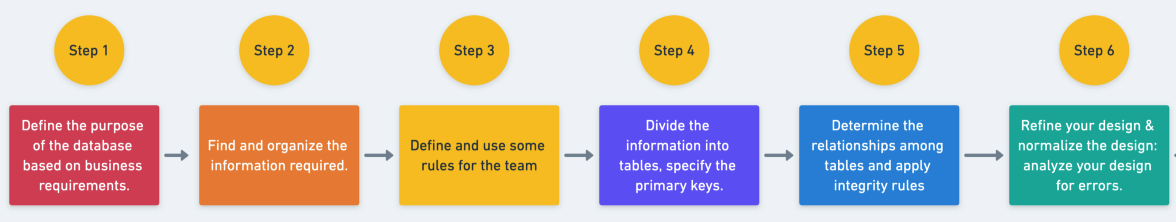

In [245]:
#!pip install duckdb

In [1]:
import requests # -> Để call API
import json # -> Xử lý file JSON
import pandas as pd # -> Thư viện xử lý dữ liệu dạng bảng
import re # -> Thư viện xử lý text: regular expressions
from datetime import datetime as dt # -> Thư viện xử lý dữ liệu thời gian
import duckdb # -> Thư viện "giả lập" xử lý dữ liệu bằng SQL 
import numpy as np

## STEP 0: XEM LẠI DATA ĐÃ CÓ (SLACK API)

Ở bước đầu tiên, ta xem lại tất cả các data của DATACracy Atom mà ra đã biết: 
* **Data từ Slack API**:
  * Danh sách thành viên
  * Danh sách các channels
  * Lịch sử tin nhắn trên các channels
* **Data do dự án tự collect - File CSV (trích xuất từ Google Spreadsheet)**:
  * Danh sách thành viên được phân theo vị trí (mentors, learners, BTC)


===> Các dữ liệu này lần lượt được lấy bằng code bên dưới.


In [2]:
## Load Token file 
## WARNING!! --- Put it in gitignore and DO NOT print out to notebook
with open('env_variable.json', 'r') as j:
    json_data = json.load(j)

### 0.1. Pull List of Members

In [3]:
# 1. LIST OF SLACK MEMBERS 

## Pull list of member as JSON
## Gọi API từ Endpoints (Input - Token được đưa vào Headers)
## Challenge: Thử gọi API này bằng Postman
endpoint = "https://slack.com/api/users.list"
headers = {"Authorization": "Bearer {}".format(json_data['SLACK_BEARER_TOKEN'])}
response_json = requests.post(endpoint, headers=headers).json() 
user_dat = response_json['members']

## Convert to CSV
user_dict = {'user_id':[],'name':[],'display_name':[],'real_name':[],'title':[],'is_bot':[]}
for i in range(len(user_dat)):
  user_dict['user_id'].append(user_dat[i]['id'])
  user_dict['name'].append(user_dat[i]['name'])
  user_dict['display_name'].append(user_dat[i]['profile']['display_name'])
  user_dict['real_name'].append(user_dat[i]['profile']['real_name_normalized'])
  user_dict['title'].append(user_dat[i]['profile']['title'])
  user_dict['is_bot'].append(user_dat[i]['is_bot'])

user_df = pd.DataFrame(user_dict) 
user_df = user_df.replace('', np.nan) # -> replace khoảng trắng bằng giá trị NULL (nan)
user_df.head()

,user_id,name,display_name,real_name,title,is_bot
0,USLACKBOT,slackbot,Slackbot,Slackbot,NaN,False
1,U01AT4T75JB,loclexuan26392,Loc Le Xuan,Loc Le Xuan,NaN,False
2,U01AVDY7JET,locle.ds,Loc Le Xuan,Loc Le Xuan,NaN,False
3,U01BE2PR6LU,maianhdang.ftu,MAD,Dặng Huỳnh Mai Anh,Technical Contents,False
4,U01C48T7S1J,huyenhoang.design,Thanh Huyen Hoang,Thanh Huyen Hoang,NaN,False


In [76]:
user_df[user_df.real_name == 'Quan Nguyễn']

,user_id,name,display_name,real_name,title,is_bot,DataCracy_role
36,U01UMJ36QD9,tranquan030894,Quân Nguyễn,Quan Nguyễn,NaN,False,Learner_Gr4


In [4]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       75 non-null     object
 1   name          75 non-null     object
 2   display_name  49 non-null     object
 3   real_name     75 non-null     object
 4   title         5 non-null      object
 5   is_bot        75 non-null     bool  
dtypes: bool(1), object(5)
memory usage: 3.1+ KB


### 0.2. List of Channels

In [4]:
# 2. LIST OF SLACK CHANNELS

endpoint2 = "https://slack.com/api/conversations.list"
data = {'types': 'public_channel,private_channel'} # -> CHECK: API Docs https://api.slack.com/methods/conversations.list/test
response_json = requests.post(endpoint2, headers=headers, data=data).json() 
channel_dat = response_json['channels']

channel_dict = {'channel_id':[], 'channel_name':[], 'is_channel':[],'creator':[],'created_at':[],'topics':[],'purpose':[],'num_members':[]}
for i in range(len(channel_dat)):
    channel_dict['channel_id'].append(channel_dat[i]['id'])
    channel_dict['channel_name'].append(channel_dat[i]['name'])
    channel_dict['is_channel'].append(channel_dat[i]['is_channel'])
    channel_dict['creator'].append(channel_dat[i]['creator'])
    channel_dict['created_at'].append(dt.fromtimestamp(float(channel_dat[i]['created'])))
    channel_dict['topics'].append(channel_dat[i]['topic']['value'])
    channel_dict['purpose'].append(channel_dat[i]['purpose']['value'])
    channel_dict['num_members'].append(channel_dat[i]['num_members'])

channel_df = pd.DataFrame(channel_dict) 
channel_df = channel_df.replace('', np.nan) # -> replace khoảng trắng bằng giá trị NULL (nan)
channel_df.head()

,channel_id,channel_name,is_channel,creator,created_at,topics,purpose,num_members
0,C01B4PVGLVB,general,True,U01BE2PR6LU,2020-09-23 17:25:03,NaN,This is the one channel that will always inclu...,65
1,C01BYH7JHB5,contents,True,U01BE2PR6LU,2020-10-05 14:28:09,NaN,NaN,12
2,C01CAMNCJJV,branding-design,True,U01AVDY7JET,2020-10-05 10:16:30,NaN,NaN,9
3,C01U6P7LZ8F,atom-assignment1,True,U01BE2PR6LU,2021-04-17 14:00:04,Assigment#1 - Python Basics &amp; Spreadsheet ...,Where learners submit assignments and give rev...,44
4,C01UL6K1C7L,atom-week1,True,U01BE2PR6LU,2021-04-17 00:44:32,TOPIC: Data Strategy. Metrics Design. Spreadsh...,TOPIC: Data Strategy. Metrics Design. Spreadsh...,43


### 0.3. Message Data

In [6]:
endpoint3 = "https://slack.com/api/conversations.history"

In [7]:
msg_dict = {'channel_id':[],'msg_id':[], 'msg_ts':[], 'user_id':[], 'latest_reply':[],'reply_user_count':[],'reply_users':[],'github_link':[]}
for channel_id, channel_name in zip(channel_df['channel_id'], channel_df['channel_name']):
  print('Channel ID: {} - Channel Name: {}'.format(channel_id, channel_name))
  try:
    data = {"channel": channel_id} 
    response_json = requests.post(endpoint3, data=data, headers=headers).json()
    msg_ls = response_json['messages']
    for i in range(len(msg_ls)):
      if 'client_msg_id' in msg_ls[i].keys():
        msg_dict['channel_id'].append(channel_id)
        msg_dict['msg_id'].append(msg_ls[i]['client_msg_id'])
        msg_dict['msg_ts'].append(dt.fromtimestamp(float(msg_ls[i]['ts'])))
        msg_dict['latest_reply'].append(dt.fromtimestamp(float(msg_ls[i]['latest_reply'] if 'latest_reply' in msg_ls[i].keys() else 0))) ## -> No reply: 1970-01-01
        msg_dict['user_id'].append(msg_ls[i]['user'])
        msg_dict['reply_user_count'].append(msg_ls[i]['reply_users_count'] if 'reply_users_count' in msg_ls[i].keys() else 0)
        msg_dict['reply_users'].append(msg_ls[i]['reply_users'] if 'reply_users' in msg_ls[i].keys() else 0) 
        ## -> Censor message contains tokens
        text = msg_ls[i]['text']
        github_link = re.findall('(?:https?://)?(?:www[.])?github[.]com/[\w-]+/?', text)
        msg_dict['github_link'].append(github_link[0] if len(github_link) > 0 else np.nan)
  except:
    print('====> '+ str(response_json))

Channel ID: C01B4PVGLVB - Channel Name: general
Channel ID: C01BYH7JHB5 - Channel Name: contents
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C01CAMNCJJV - Channel Name: branding-design
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C01U6P7LZ8F - Channel Name: atom-assignment1
Channel ID: C01UL6K1C7L - Channel Name: atom-week1
Channel ID: C01ULCHGN75 - Channel Name: atom-general
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C020VMT58JK - Channel Name: topics-data-analytics
Channel ID: C0213MNH9L6 - Channel Name: topics-python
Channel ID: C0213N56M2A - Channel Name: topics-materials
Channel ID: C021FSDN7LJ - Channel Name: atom-assignment2
Channel ID: C021KLB0DSB - Channel Name: discuss-group3
Channel ID: C021KLB90GP - Channel Name: discuss-group4
Channel ID: C02204B2CD6 - Channel Name: atom-week2
Channel ID: C0220KU9399 - Channel Name: discuss-group1
Channel ID: C0226D3LEQ4 - Channel Name: atom-week3
Channel ID: C0227A51SAY - Channel Name: atom-ass

In [8]:
msg_df = pd.DataFrame(msg_dict)
msg_df = msg_df.replace('', np.nan) # -> replace khoảng trắng bằng giá trị NULL (nan)
msg_df.tail()

,channel_id,msg_id,msg_ts,user_id,latest_reply,reply_user_count,reply_users,github_link
256,C022RRWQ6US,3db33d2a-5666-44cf-95e0-dd33aee4e63c,2021-05-24 18:49:29.003700,U01BE2PR6LU,1970-01-01 08:00:00.000000,0,0,NaN
257,C022RRWQ6US,8b4a2ebb-7882-402b-8339-a0b067ce5165,2021-05-23 14:58:23.003000,U01BE2PR6LU,1970-01-01 08:00:00.000000,0,0,NaN
258,C022RRWQ6US,231fad01-7083-4cd0-b6b6-e97bf54779e2,2021-05-23 06:23:13.001400,U01BE2PR6LU,1970-01-01 08:00:00.000000,0,0,https://github.com/anhdanggit/
259,C022Y1FUETE,ee582f3d-c339-4d06-a263-b71c6470e647,2021-05-24 18:49:57.001000,U01BE2PR6LU,1970-01-01 08:00:00.000000,0,0,NaN
260,C022Y1FUETE,38adf48f-21cc-437c-9ad3-31cd002bc4f8,2021-05-23 14:58:05.001500,U01BE2PR6LU,2021-05-23 23:15:45.002200,1,[U01VB632FPS],NaN


In [10]:
msg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   channel_id        259 non-null    object        
 1   msg_id            259 non-null    object        
 2   msg_ts            259 non-null    datetime64[ns]
 3   user_id           259 non-null    object        
 4   latest_reply      259 non-null    datetime64[ns]
 5   reply_user_count  259 non-null    int64         
 6   reply_users       259 non-null    object        
 7   github_link       96 non-null     object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 16.3+ KB


### 0.4. DataCracy Info
* **Data do dự án tự collect - File CSV (trích xuất từ Google Spreadsheet)**: Danh sách thành viên được phân theo vị trí (mentors, learners, BTC)
* Trong cùng folder Github `assignment_4`

In [9]:
dtc_groups = pd.read_csv('datacracy_groups.csv')
dtc_groups.head()

,name,DataCracy_role
0,slackbot,BTC
1,loclexuan26392,BTC
2,locle.ds,BTC
3,maianhdang.ftu,BTC
4,huyenhoang.design,BTC


## STEP 1: NHU CẦU & MỤC ĐÍCH
> Đặt mình vào vị trí người chủ, bạn quan tâm đến điều gì?

* Quan trọng nhất của mọi Data Solution, là bắt đầu từ nhu cầu, mục đích và câu hỏi lớn của Clients (người chủ). 
* Chính từ những câu hỏi lớn này, ta có thể khoanh vùng thông tin nào quan trọng, ta muốn đạt được điều gì?

### TODO#1: Requirements
Tự trả lời các câu hỏi sau, từ góc nhìn của bạn (đặt mình vào vị trí bạn là co-founder của dự án DataCracy): 
1. Mục đích của lớp học Atom là gì?
2. BTC sẽ quan tâm đến những chủ đề/quy trình gì để đạt được Mục Đích trong (1)?
3. Làm sao để đo lường các điểm trong (2)? => Metrics?
4. Dựa vào các data đã có như liệt kê trong `STEP 0`:
  * Chỉ dùng những data sẵn có, ta có thể đo lường và thiết kế những metrics nào bạn đã liệt kê trong (3)?
  * Tham khảo Slack API và hình dung về các thông tin DataCracy có khả năng thu thập, bạn sẽ đề xuất DataCracy thu thập thêm những thông tin gì?


##### The answers TODO#1:
 
- Hiện tại, thời đại mà data (dữ liệu) đã xuất hiện ở hầu hết mọi ngóc ngách trong đời sống, bạn có xài FB không? chỉ một like của bạn về một đôi giày chẳng hạn, ngay sau đó rất nhiều quảng cáo liên quan đến giày, lót giày, thuốc khử hôi chân, tất, đồ chạy bộ,... rất nhiều nữa sẽ được đề xuất. Vậy điều này từ đâu mà ra? Từ chính dữ liệu hành vi của bạn. Còn rất nhiều thứ liên quan đến dữ liệu nữa mà con người đang khai thác và tận dụng nó trong rất nhiều lĩnh vực để nâng cao chất lượng cuộc sống. 
- Data không chỉ là Data nó là cả một câu chuyện.


1. ##### Mục đích của lớp học Atom: 
Với số lượng người học là 40, ở rất nhiều các ngành nghề lĩnh vực khác nhau, họ ở đây là muốn tìm hiểu về dữ liệu. Lớp học mong muốn từ những nhu cầu chính đáng và thiết thực đó có thể cung cấp những nền tảng kiến thức cơ bản về quá trình của Data Solution cho người học.
2. ##### Những điều cần quan tâm: 
Vậy để có thể đạt được mục đích trên lớp học cần quan tâm đến 2 điều quan trọng: con người và nội dung.
- Tại sao lại là con người: 
 - 2.1 Đối với người học: đam mê, nghiêm túc trong việc học hỏi, tìm tòi.
 - 2.2 Đối với người hướng dẫn: là những người có chuyên môn cao, yêu trẻ để có thể hỗ trợ người học.
- Về nội dung: là một lớp học về khoa học và kỹ thuật trong đó học viên là những người từ các lĩnh vực khác nhau nên nội dung là một phần rất quan trọng để có thể truyền tải mục đích của lớp học. Nếu con người là điều kiện cần thì nội dung là điều kiện đủ để có thể đạt được mục đích của lớp học.
 - 2.3 Nội dung khóa học: từ "bức tranh" toàn cảnh cho tới những ý tưởng và công cụ để hiện thực hóa "bức tranh". Việc lựa chọn nội dung là một trong những điều hết sức quan trọng. Cần đảm bảo nội dung là cốt lõi và thực tế, có khả năng mô phỏng ví dụ để trực quan. 
 - 2.4 Cách thức truyền tải và quá trình tiếp nhận nội dung: "Cái gì của mình thì mãi là của mình". Làm sao để là của mình, phải tự mình tìm hiểu, tự mình làm. Bên cạnh đó là sự hướng dẫn và trợ giúp từ người hướng dẫn của  lớp học --> từ đó thấy vấn đề con người rất quan trọng trong quá trình này.
##### Một mối liên kết ở đây là: con người tạo và quyết định nội dung. Nội dung lại  tạo và dẫn đến quyết định hành động của con người. 
3. Đo lường các vấn đề để có thể đạt được mục đích lớp học:
- Về yếu tố con người cần đánh giá sự nghiêm túc của người học thông qua các bài tập, hoạt động mà lớp học đề ra.
 - Cụ thể ở mức độ tìm hiểu và hoàn thành ở các bài tập, hoạt động mà lớp học đề ra qua các tuần học.
 - Metric: 
    1. Thời gian nộp bài so với deadline, thời gian re-submit. 
    2. Việc đặt các câu hỏi hay góp ý về bài tập.
    3. Số buổi lên lớp.
- Về nội dung: cần đánh giá được mức độ phù hợp và khả năng thúc đẩy người học.
 - Cụ thể là khảo sát về các mức độ hoàn thành bài tập.
  - Metric:
    1. Phần trăm hoàn thành của các nội dung trong assingment. 
       Ví dụ: một bài tập gồm 2 phần: lập trình:phân tích. Tỷ lệ hòan thành 40:80
    2. Số lượng của các chủ đề thắc mắc.
    3. Mức độ đánh giá về nội dung của học viên.
4. Hiện tại data trên Slack của DataCracy gần như đáp ứng đầy đủ những thông tin metric ở câu 3. Chỉ cần thêm một số rule quy định về format khi post bài, thắc mắc sẽ hoàn chỉnh hơn.
    - Nếu có thể , nên thu thập thêm đánh giá của học viên về bài tập theo thang điểm 10 và có phần feedback.


## STEP 2: TỔ CHỨC THÔNG TIN
> Thu thập và hệ thống lại các thông tin

In [10]:
user_df = pd.merge(user_df, dtc_groups, how="left", on=["name"])

In [11]:
## Hints: info() để check các thông tin (Column), số dòng (Count), và Data Type của mỗi cột
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         75 non-null     object
 1   name            75 non-null     object
 2   display_name    49 non-null     object
 3   real_name       75 non-null     object
 4   title           5 non-null      object
 5   is_bot          75 non-null     bool  
 6   DataCracy_role  59 non-null     object
dtypes: bool(1), object(6)
memory usage: 4.2+ KB


In [13]:
user_df.head()

,user_id,name,display_name,real_name,title,is_bot,DataCracy_role
0,USLACKBOT,slackbot,Slackbot,Slackbot,NaN,False,BTC
1,U01AT4T75JB,loclexuan26392,Loc Le Xuan,Loc Le Xuan,NaN,False,BTC
2,U01AVDY7JET,locle.ds,Loc Le Xuan,Loc Le Xuan,NaN,False,BTC
3,U01BE2PR6LU,maianhdang.ftu,MAD,Dặng Huỳnh Mai Anh,Technical Contents,False,BTC
4,U01C48T7S1J,huyenhoang.design,Thanh Huyen Hoang,Thanh Huyen Hoang,NaN,False,BTC


### TODO#2: List Down
Trả lời các câu hỏi sau: 
1. Có những thông tin gì trong các bảng data ở `STEP 0`? Ý nghĩa của mỗi trường (Column). `Hints: Đọc thêm Slack API để hiểu ý nghĩa data trả về`
2. Data Type của mỗi trường
3. Có NULL không? (Non-Null Count <> entries)

* Ta sẽ dùng công cụ: [QuickDBD](https://www.quickdatabasediagrams.com/) cho Assignment này => Tham khảo Sample lúc mở tool
* Copy điền đoạn text vào tools

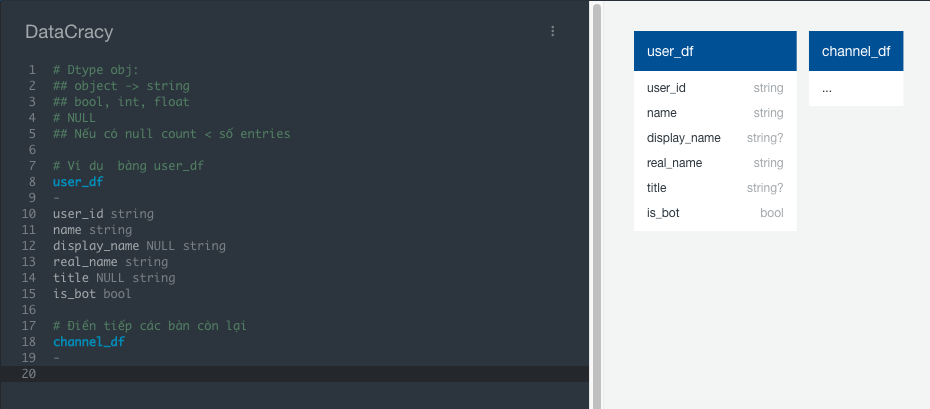

In [ ]:
## Điền vào bên dưới câu trả lời của bạn
## Bên dưới là ví dụ của bảng user_df (Điền tiếp các bản còn lại)
''' 
# Dtype obj: object -> string, bool, int, float
# NULL - Nếu có null count < số entries

# Ví dụ  bảng user_df 
user_df
-
user_id string
name string
display_name NULL string
real_name string
title NULL string
is_bot bool
DataCracy_role string

# Điền tiếp các bản còn lại

## channel_df
channel_df
-
channel_id string
channel_name string
is_channel bool
creator string
created_at date
topics NULL string
purpose NULL string
num_members number

##msg_df
msg_df
-
channel_id string
msg_id string
msg_ts date
user_id string
latest_reply null string
reply_user_count number
reply_users null string
github_link null string


'''

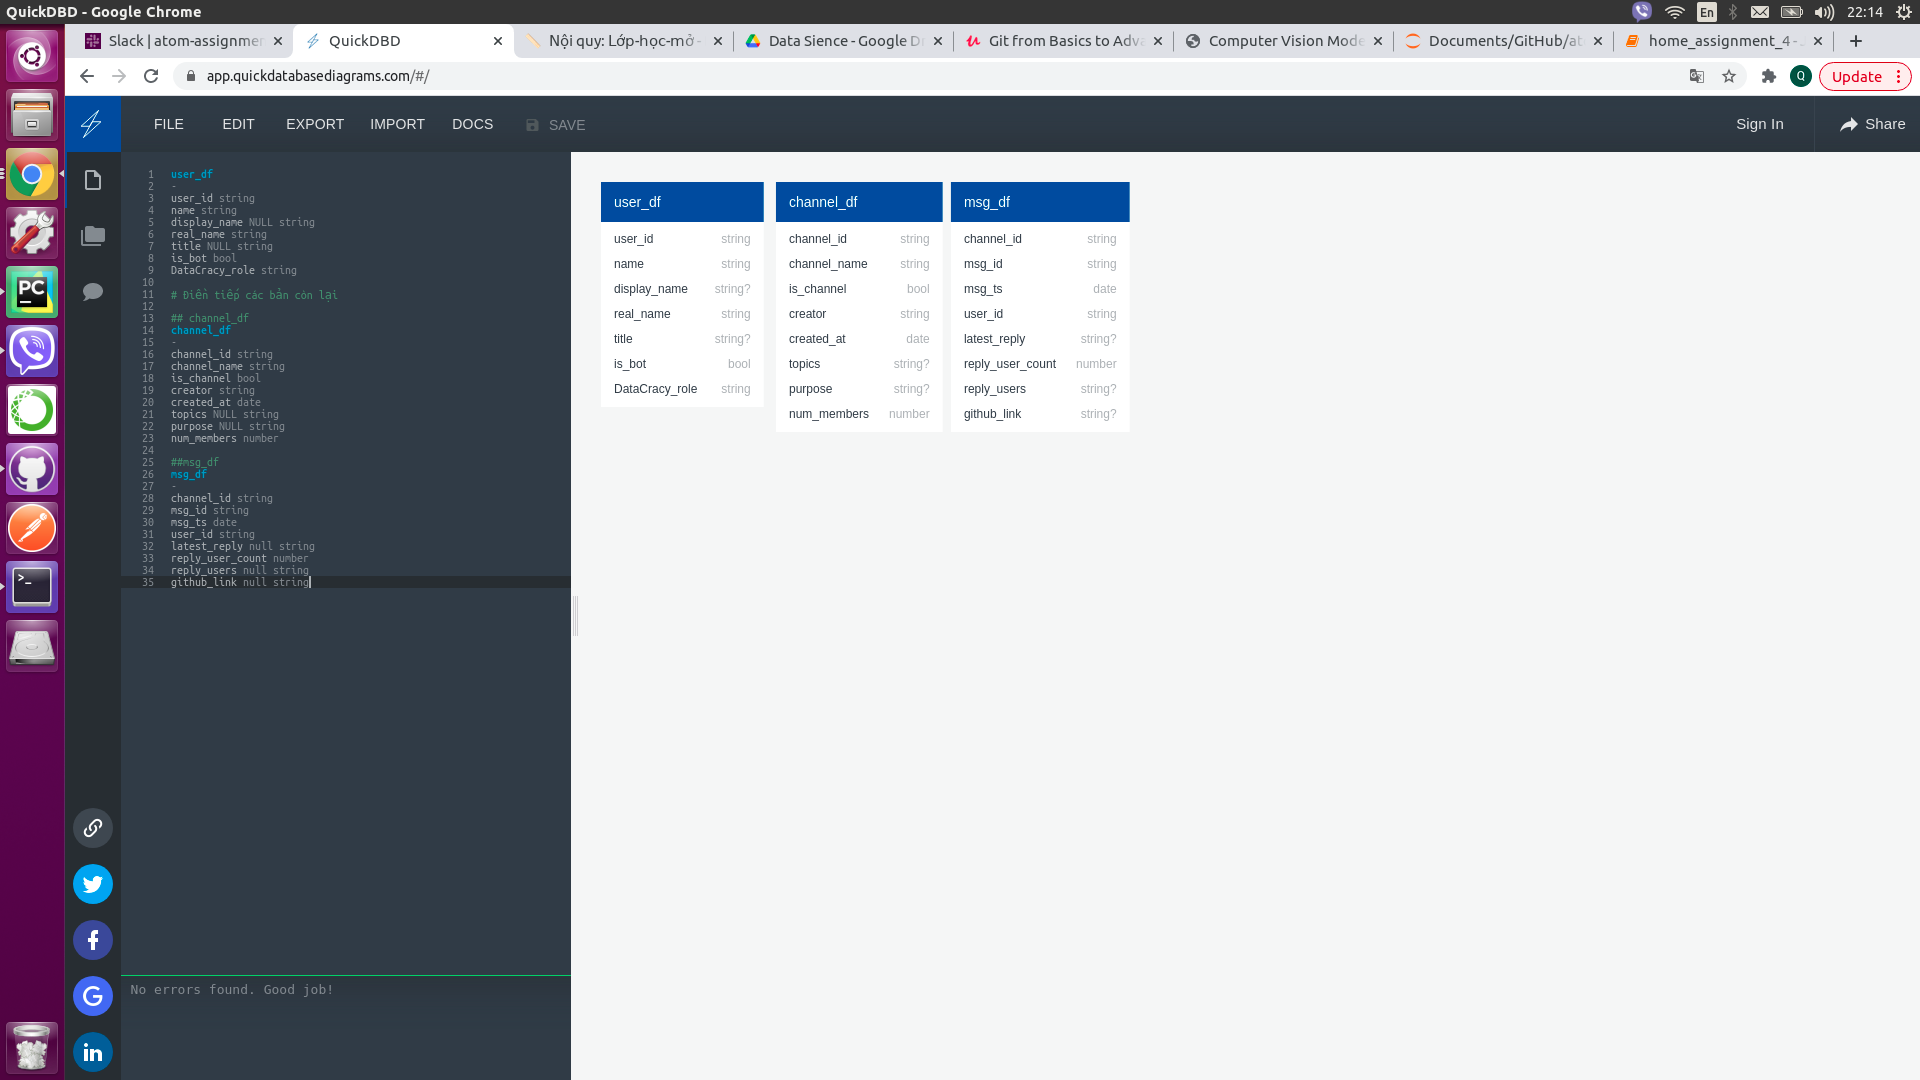

## STEP 3: NGUYÊN TẮC CẦN ÁP DỤNG

### TODO#3: Rules & Logics
Dựa vào các kiến nghị `TODO#1` và Quan sát ở `TODO#2`, bạn có những đề xuất gì về rules trong vận hành để cải thiện thông tin và quan sát? 

#### Về mặt vận hành
> Rules gì cần áp dụng cho cách thức nhập data?

**Một số gợi ý**
1. Rules để cải thiện tỷ lệ NULL trong các bạn? (Ví dụ: Bắt buộc nhập các thông tin trên Slack? Có cần thiết không?)
2. Làm sao để xác định message nào là bài submit assigment? Message nào là review? Message vào là các nội dung không liên quan? (Ví dụ: Users để tag #submit, #review?)
3. ...

#### Về mặt data
> Logics gì cần áp dụng để kiểm tra sự hợp lý của Data?

**Một số gợi ý**
1. Hai users trùng tên?
2. Ngày latest reply > ngày post? 
3. Ngày post trong năm 2021 (sau khi dự án DataCracy thành lập)
4. Mentor Group nào sẽ chỉ post trong channel discussion của group đó?
5. ...

Bạn có thể đưa các đề xuất để đưa vào vận hành nhằm cải thiện data và giúp bạn đo lường theo dõi các metrics đã được liệt kể trong `TODO#1`


RULES
---
1. Các bài tập đêu phải được review từ các người học khác ít nhất là 2 người.
2. Nên có những format cụ thể và tag khi post bài. Ví dụ: Assignment4 -- #submit: xuống hàng là link bài. Hoặc tag theo chủ đề ví dụ: Topic Python #Pandas xuống hàng câu hỏi. --> thống kê các topic được dễ dàng hơn cho việc điều chỉnh nội dung.
3. Những thông tin cơ bản trên Slack là đủ cho việc phân tích. Nếu muốn sâu hơn việc điền thông tin 'What i do' cũng là một thông tin thú vị để có thể đánh giá được mặt bằng của lớp học.
4. Khi review nên thống nhất một reaction cố định để có thể dễ dàng nhận biết là bài làm tránh nhầm lẫn những bài post về thắc mắc.
5. Khi post bài ngoài tag và format quy định. Chỉ sử dụng message không đính kèm hình ảnh.

LOGICS
---
1. Các thông tin về ID là không thể trùng lắp nhau. Ví dụ Channel_id của week1 không thể giống week2.
2. Ngày latest reply phải lớn hơn ngày create post.
3. Ngày post sau khi lớp học bắt đầu 28-4-2021.
4. Người học đã nộp bài nhưng không có trong dữ liệu.
'''

## STEP 4: TỔ CHỨC BẢNG - PRIMARY KEYS

In [17]:
## Hints: nunique() để check số giá trị unique của từng trường
user_df.nunique()

user_id           75
name              75
display_name      48
real_name         73
title              5
is_bot             2
DataCracy_role    10
dtype: int64

### TODO#4: Tables & PK
1. Nhìn lại diagram của `TODO#2` trong Quick DBD Diagram: Có bảng nào bạn nghĩ nên gộp lại, hay tách ra không? Vì sao?
2. Tìm Primary Key (PK): Unique cho từng dòng và Không NULL
> Primary Key (PK) là trường giá trị/ID unique cho mỗi dòng của bảng. Hay nói cách khác, không có hai dòng trùng lặp (duplicate ID). 
* Fun fact để nhớ: Thử tưởng tượng nếu 2 người không quen biết, có cùng Số TK Ngân hàng :((((

In [ ]:
## Copy lại phần text của TODO#2
## Combination : user_df = pd.merge(user_df, dtc_groups, how="left", on=["name"])
## Đặt PK bên cạnh col bạn chọn làm PK
''' 
# Dtype obj: object -> string, bool, int, float
# NULL - Nếu có null count < số entries

# Ví dụ  bảng user_df 
user_df
-
user_id string PK
name string
display_name NULL string
real_name string
title NULL string
is_bot bool
DataCracy_role string

# Điền tiếp các bản còn lại

## channel_df
channel_df
-
channel_id string PK
channel_name string
is_channel bool
creator string
created_at date
topics NULL string
purpose NULL string
num_members number

##msg_df
msg_df
-
channel_id string 
msg_id string
msg_ts date
user_id string
latest_reply null string
reply_user_count number
reply_users null string
github_link null string

# Điền tiếp các bản còn lại


## STEP 5: MỐI QUAN HỆ GIỮA CÁC BẢNG

### TODO#5: FK & Mapping
Như đã giới thiệu ở phần Concept, keys quan trọng trong Relational DB vì nó thể hiện mối quan hệ giữa các bạn, thông qua key, cho phép ta nối các bảng với nhau. 
Bây giờ ta sẽ đi tìm FK (Foreign Key):
> Foreign Key: Là các keys nằm trong một bảng để liên kết với PK trong bảng khác

1. Đâu là các ID trong bảng, nhưng không phải là PK (do thoả điều kiện unique)?
2. Các ID này dẫn đến PK nào trong các bảng còn lại?
3. Trong các key được nối với nhau, xác định kiểu quan hệ:
  * n:1 - PK ở bảng gốc lặp lại nhiều lần (nhiều dòng) ở bản chứa FK
  * 1:1 - PK ở bảng gốc chỉ nối với 1 dòng

**Ví dụ:** `channel_id string FK >- channel_df.channel_id`

In [ ]:
## Copy lại phần text của TODO#2
## Đặt FK bên cạnh col bạn chọn làm FK
## Và thể hiện mối quan hệ bằng: id >- bảng_gốc.id (FK là PK trong bảng gốc)
''' 
# Ví dụ  bảng user_df 
user_df
-
user_id string PK
name string
display_name NULL string
real_name string
title NULL string
is_bot bool
DataCracy_role string

# Điền tiếp các bản còn lại

## channel_df
channel_df
-
channel_id string PK
channel_name string
is_channel bool
creator string
created_at date
topics NULL string
purpose NULL string
num_members number

##msg_df
msg_df
-
channel_id string FK >- channel_df.channel_id
msg_id string
msg_ts date
user_id string FK >- user_df.user_id
latest_reply null string
reply_user_count number
reply_users null string
github_link null string

# Điền tiếp các bản còn lại


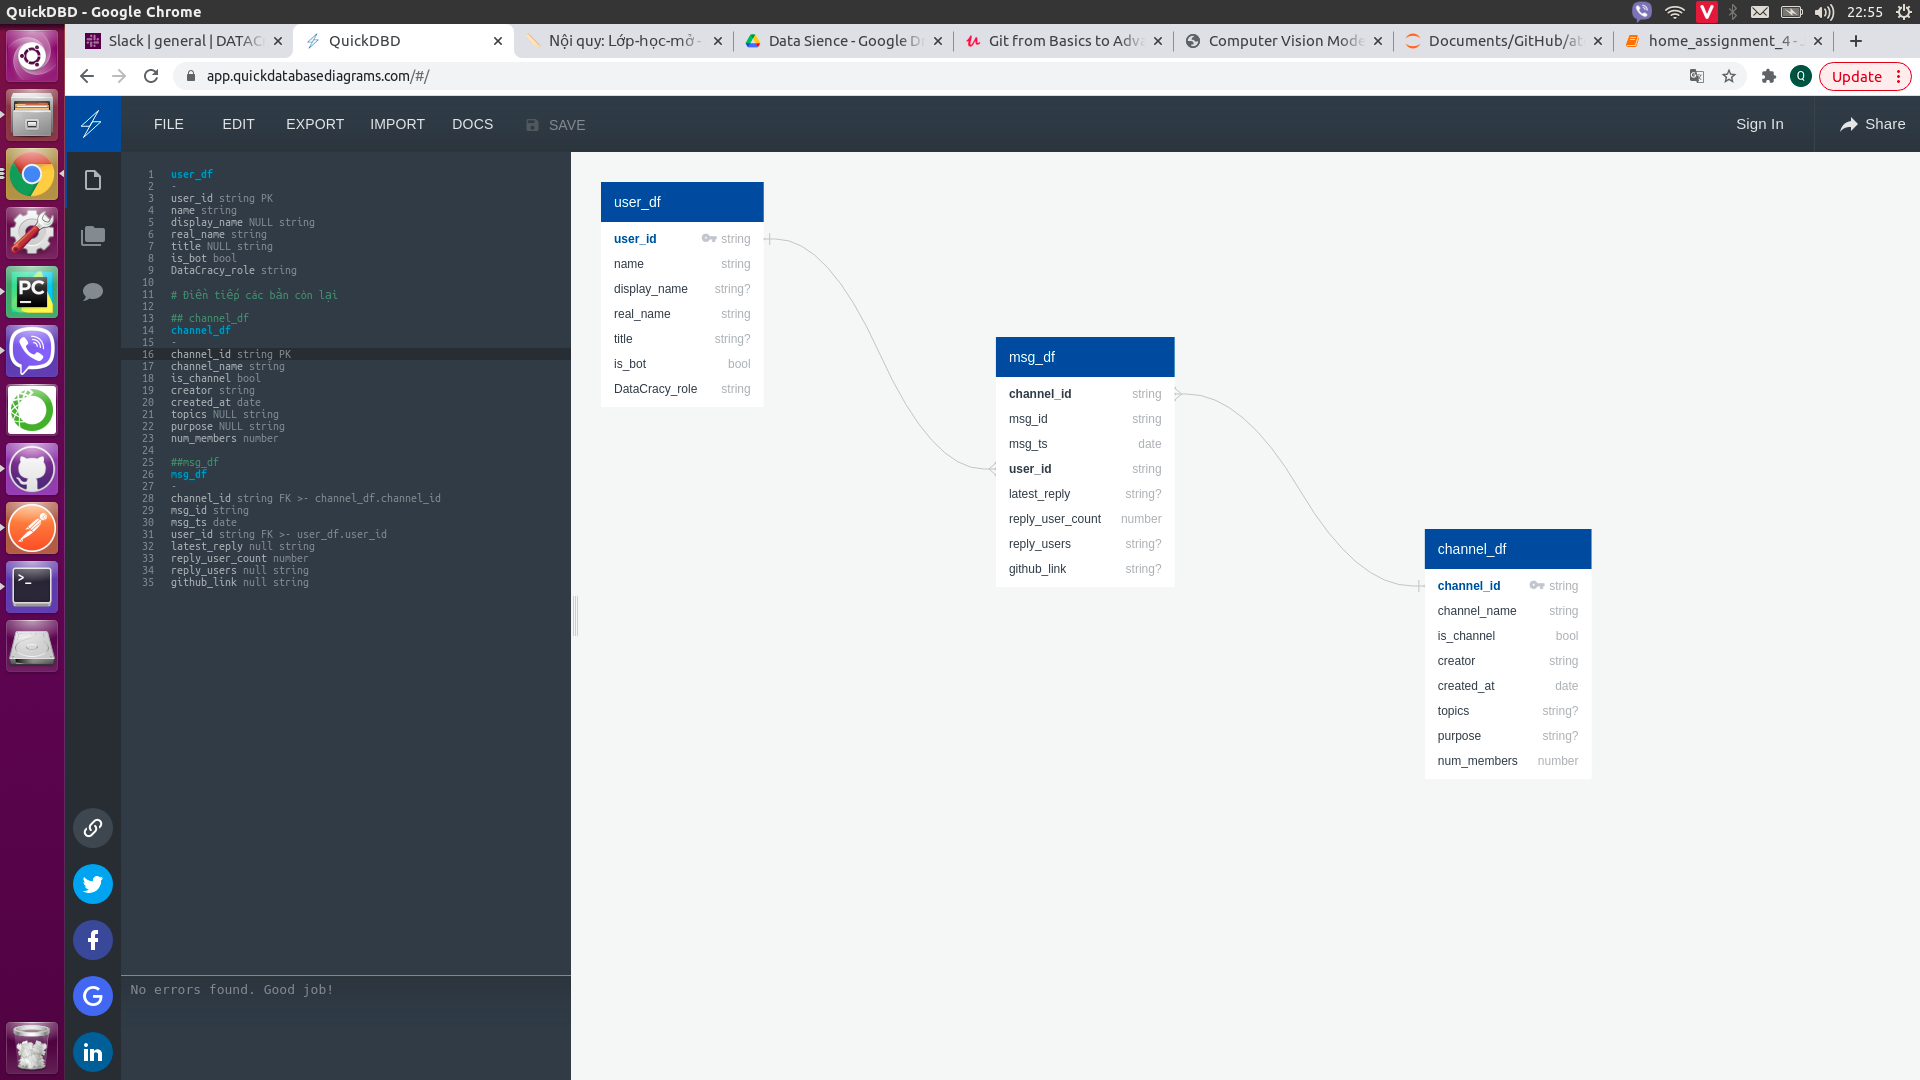

## STEP 6: DIAGRAM & TEST
Sau khi làm hết `TODO#5` bạn sẽ được 1 DB Diagram như trong sample mẫu bên dưới (Sample này không phải của DataCracy)

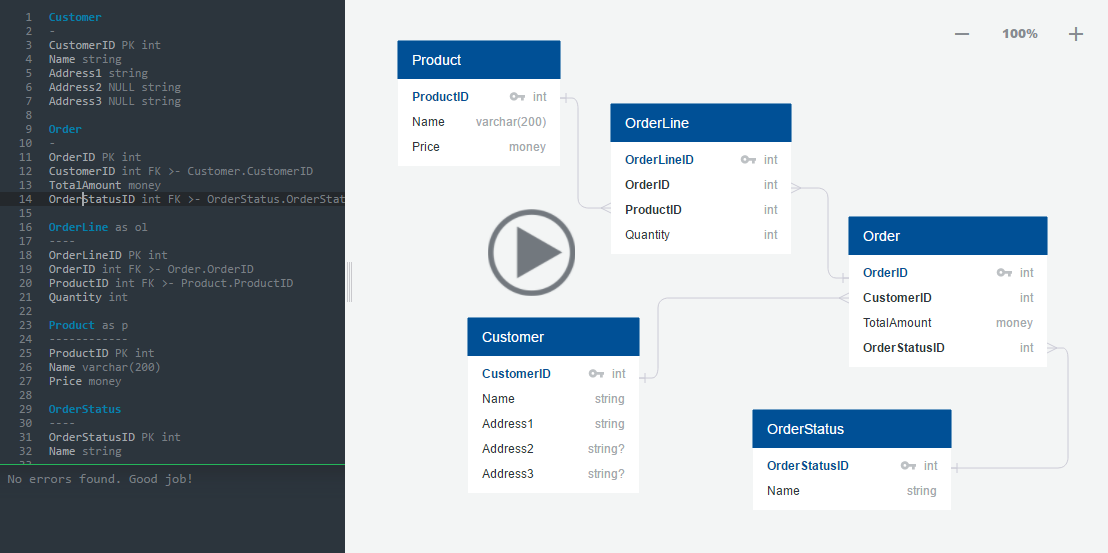

### Test Database Design by SQL
* Để giúp các bạn làm quen với việc thao tác trên SQL, ta sử dụng thư việc duckdb, cho phép ta thao tác với Data trên Python bằng SQL: https://duckdb.org/2021/05/14/sql-on-pandas.html
* Để hiểu các code SQL bên dưới, tham khảo [SQL Basic Cheatsheet](https://learnsql.com/blog/sql-basics-cheat-sheet/), xem các phần:
  * Querying Single Table
  * Aliases 
  * Filtering
  * Querying Multiple Tables: Các dạng Join
  * Aggregation Functions

* Dựa vào DB Diagram bạn đã vẽ, sẽ giúp bạn dễ dàng theo dõi hơn trong việc join và xử lý data

In [16]:
## Đoạn code dưới join 2 bảng user_df vằ dtc_groups bằng key name => Tạo thành bảng members_df
SQL_dim_members = '''
-- Để comment trong SQL dùng -- tương đường với ## trong Python
CREATE TABLE members_df AS
SELECT *
FROM user_df 
'''

In [17]:
con = duckdb.connect(database=':memory:', read_only=False) # -> Tạo DB connection
# create a table
con.execute(SQL_dim_members) # -> Chạy đoạn lệch SQL
con.execute("SELECT * FROM members_df LIMIT 10").fetch_df() # -> In 10 dòng đầu tiên của bảng members_df ra Dataframe

,user_id,name,display_name,real_name,title,is_bot,DataCracy_role
0,USLACKBOT,slackbot,Slackbot,Slackbot,NaN,False,BTC
1,U01AT4T75JB,loclexuan26392,Loc Le Xuan,Loc Le Xuan,NaN,False,BTC
2,U01AVDY7JET,locle.ds,Loc Le Xuan,Loc Le Xuan,NaN,False,BTC
3,U01BE2PR6LU,maianhdang.ftu,MAD,Dặng Huỳnh Mai Anh,Technical Contents,False,BTC
4,U01C48T7S1J,huyenhoang.design,Thanh Huyen Hoang,Thanh Huyen Hoang,NaN,False,BTC
5,U01CMTYB7EU,dr.tringuyenzmc,NaN,Dr Tringuyenzmc,NaN,False,BTC
6,U01GQR2FE93,khanguyenwk,NaN,Kha Nguyen,NaN,False,Volunteer
7,U01HARCHNKU,linhphan,NaN,Phan Linh,NaN,False,BTC
8,U01JQ5TUP0B,tt.thuchuyen,NaN,Tt Thuchuyen,NaN,False,BTC
9,U01JQ5U1RPV,thuongthuong.dv,NaN,Thuong Do,NaN,False,BTC


In [22]:
con.execute("SELECT * FROM channel_df LIMIT 5").fetch_df() # -> In 5 dòng đầu tiên của bảng channel_df ra Dataframe

,channel_id,channel_name,is_channel,creator,created_at,topics,purpose,num_members
0,C01B4PVGLVB,general,True,U01BE2PR6LU,2020-09-23 17:25:03,NaN,This is the one channel that will always inclu...,65
1,C01BYH7JHB5,contents,True,U01BE2PR6LU,2020-10-05 14:28:09,NaN,NaN,12
2,C01CAMNCJJV,branding-design,True,U01AVDY7JET,2020-10-05 10:16:30,NaN,NaN,9
3,C01U6P7LZ8F,atom-assignment1,True,U01BE2PR6LU,2021-04-17 14:00:04,Assigment#1 - Python Basics &amp; Spreadsheet ...,Where learners submit assignments and give rev...,44
4,C01UL6K1C7L,atom-week1,True,U01BE2PR6LU,2021-04-17 00:44:32,TOPIC: Data Strategy. Metrics Design. Spreadsh...,TOPIC: Data Strategy. Metrics Design. Spreadsh...,43


In [23]:
con.execute("SELECT * FROM msg_df LIMIT 5").fetch_df() # -> In 5 dòng đầu tiên của bảng msg_df ra Dataframe

,channel_id,msg_id,msg_ts,user_id,latest_reply,reply_user_count,reply_users,github_link
0,C01B4PVGLVB,48ba219d-fda8-40f2-be65-00735c058071,2021-05-25 11:59:27.000600,U01BE2PR6LU,2021-05-25 13:04:44.006500,4,NaN,NaN
1,C01B4PVGLVB,89919b55-bfe9-4c15-bf45-3021048c7c28,2021-05-24 18:49:08.061100,U01BE2PR6LU,1970-01-01 08:00:00.000000,0,NaN,NaN
2,C01B4PVGLVB,18467584-5810-4bb9-80fe-4b92af9b28d0,2021-05-23 23:26:04.057000,U01UTGT8CVA,2021-05-24 15:36:52.058100,2,NaN,NaN
3,C01B4PVGLVB,dfd2bf1a-69a1-4ac3-aacb-e2daaae8cc04,2021-05-23 14:57:36.055300,U01BE2PR6LU,1970-01-01 08:00:00.000000,0,NaN,NaN
4,C01B4PVGLVB,fd5d6cf7-415c-459a-818c-72835fd2479a,2021-05-23 06:28:27.053900,U01BE2PR6LU,1970-01-01 08:00:00.000000,0,NaN,NaN


In [24]:
## Đoạn code dưới: Theo từng channel, count số message (phải join với bảng channel_df để lấy tên channel)
SQL = '''
SELECT 
  t2.channel_name,
  COUNT(DISTINCT t1.msg_id) AS msg_cnt
FROM msg_df AS t1
JOIN channel_df AS t2
ON t1.channel_id = t2.channel_id
GROUP BY t2.channel_name 
ORDER BY COUNT(DISTINCT t1.msg_id) DESC
'''
con.execute(SQL).fetch_df()

,channel_name,msg_cnt
0,general,42
1,atom-assignment1,42
2,atom-assignment2,42
3,atom-assignment3,36
4,discuss-group1,32
5,discuss-group3,16
6,topics-python,13
7,discuss-group4,11
8,atom-assignment4,7
9,atom-week1,6


In [25]:
## Đoạn code dưới: Lấy top 3 mentors post nhiều message nhất trong discuss-group của các nhóm
SQL = '''
WITH msg_cnt AS ( ------------- > (1) Chain SQL: tạo bảng tạm thời msg_cnt: count số msg theo user, theo channel
  SELECT 
    user_id,
    channel_id,
    COUNT(msg_id) AS msg_cnt
  FROM msg_df 
  GROUP BY 1, 2
)
SELECT
  t2.real_name,
  t3.channel_name,
  t1.msg_cnt,
  t2.DataCracy_role
FROM msg_cnt AS t1
JOIN members_df AS t2 ------------ > (2) Join msg_count với members_df để lấy tên và role
ON t1.user_id = t2.user_id
JOIN channel_df AS t3 --> (3) Join với channel_df để lấy tên channel
ON t1.channel_id = t3.channel_id
WHERE t2.DataCracy_role LIKE 'Mentor%' ------------- > (4) Filter Mentors
AND t3.channel_name LIKE 'discuss-group%' ---------- > (5) Filter channel discuss theo các group
ORDER BY t1.msg_cnt DESC ---------- > (6) Sẵp xếp theo số msg từ cao xuống thấp
LIMIT 3 ------------> (7) Lấy top 3
'''
con.execute(SQL).fetch_df()

,real_name,channel_name,msg_cnt,DataCracy_role
0,Phu NDT,discuss-group1,11,Mentor_Gr1
1,Nguyễn Quang Long,discuss-group3,9,Mentor_Gr3
2,Thuy Nguyen,discuss-group4,4,Mentor_Gr4


### TODO#6: SQL
* Thay đổi các phần trong những đoạn code SQL trên, print kết quả để hiểu về code
* Tham khảo thêm [SQL Basic Cheatsheet](https://learnsql.com/blog/sql-basics-cheat-sheet/)
* Và, GOOGLE! + Cùng trao đổi trên Slack
* Và viết SQL để trả lời các câu hỏi sau:
```
  1. Learners groups nào hoạt động tích cực trên Slack nhất? (tính theo message count)?
  Learners nào nộp bài sớm nhất trong Assignment 1, 2, 3?
  2. Learner nào nộp bài trễ nhất trong Assignment 1, 2, 3?
  3. Learner nào chưa nộp bài Assignment 3?
  4. Learner nào chưa nộp bất kỳ 1 assignment nào?
  5. Tỷ lệ % Learner đã nộp assignment 1, 2, 3? (*giả sử có message trong channel atom-assignment, được tính là đã submit*)
  6. Tỷ lệ % Learner đã submit bài và dc review trong assignment 1, 2, 3?
  7. Learners theo Group nào có tỷ lệ % hoàn thành bài tập cao nhất?
```
* `[Optional]` Bạn có thể tự đặt thêm bất kỳ câu hỏi nào bạn quan tâm



In [52]:
SQL_1 = '''
WITH msg_cnt AS ( ------------- > (1) Chain SQL: tạo bảng tạm thời msg_cnt: count số msg theo user, theo channel
  SELECT 
    user_id,
    COUNT(msg_id) AS msg_cnt
  FROM msg_df 
  GROUP BY 1
)
select
t.real_name,
max(a.msg_cnt) msg_cnt,
DataCracy_role
from msg_cnt  a 
join  members_df t on t.user_id = a.user_id
where t.DataCracy_role like '%Learner%'
group by real_name,DataCracy_role
order by msg_cnt desc
LIMIT 1
'''
con.execute(SQL_1).fetch_df()

,real_name,msg_cnt,DataCracy_role
0,Việt Hồng Chu,14,Learner_Gr1


In [63]:
# U01BE2PR6LU
SQL_2 = '''
with time_ as (
  SELECT 
    channel_name,
    min(msg_ts) as time_
  FROM msg_df t 
  join channel_df a on t.channel_id = a.channel_id
  where a.channel_name in ('atom-assignment1','atom-assignment2','atom-assignment3')
  and t.github_link is not null and t.user_id not in ('U01BE2PR6LU')
  group by channel_name
)
select a.channel_name,
a.time_,
b.real_name,
b.DataCracy_role
from msg_df t
join time_ a on t.msg_ts  = a.time_
join members_df b on t.user_id = b.user_id

'''
con.execute(SQL_2).fetch_df()

,channel_name,time_,real_name,DataCracy_role
0,atom-assignment1,2021-04-21 13:00:34.000800,Hưng Dương Phan Nam,Learner_Gr1
1,atom-assignment2,2021-05-12 22:50:48.004000,Toan Tran,Learner_Gr2
2,atom-assignment3,2021-05-16 19:08:08.018900,Hanh Nguyen,Learner_Gr4


In [18]:
SQL_3 = '''
with time_ as (
  SELECT 
    channel_name,
    max(msg_ts) as time_
  FROM msg_df t 
  join channel_df a on t.channel_id = a.channel_id
  where a.channel_name in ('atom-assignment1','atom-assignment2','atom-assignment3')
  and t.github_link is not null and t.user_id not in ('U01BE2PR6LU')
  group by channel_name
)
select a.channel_name,
a.time_,
b.real_name,
b.DataCracy_role
from msg_df t
join time_ a on t.msg_ts  = a.time_
join members_df b on t.user_id = b.user_id

'''
con.execute(SQL_3).fetch_df()

,channel_name,time_,real_name,DataCracy_role
0,atom-assignment1,2021-05-10 11:51:46.004700,Danh Phan,Learner_Gr3
1,atom-assignment2,2021-05-22 12:39:34.015500,Hanh Nguyen,Learner_Gr4
2,atom-assignment3,2021-05-27 11:51:30.001100,Giang Phan,Learner_Gr1


In [77]:
# có trường hợp người học đã nộp bài nhưng không nằm trong dữ liệu.
SQL_4 = '''
with user_ as (
  SELECT
  distinct user_id,
    channel_name
  FROM msg_df t 
  join channel_df a on t.channel_id = a.channel_id
  where a.channel_name in ('atom-assignment3')
  and t.github_link is not null 
  and t.user_id not in ('U01BE2PR6LU')
)
select b.channel_name,
t.real_name,
t.DataCracy_role
from members_df t
left join user_ b on t.user_id = b.user_id
where b.user_id is null
and DataCracy_role like '%Learner%'

'''
con.execute(SQL_4).fetch_df()

,channel_name,real_name,DataCracy_role
0,NaN,Viet Hoang,Learner_Gr4
1,NaN,Ngoc Huyen,Learner_Gr1
2,NaN,Trang Nguyễn,Learner_Gr3
3,NaN,Nguyen Thi Kim Minh,Learner_Gr2
4,NaN,Nguyen Linh,Learner_Gr1
5,NaN,Minh-Thu Nguyen Hoang,Learner_Gr4
6,NaN,Việt Hồng Chu,Learner_Gr1
7,NaN,Ngo Thi Minh Trang,Learner_Gr1
8,NaN,Tran Pham,Learner_Gr3
9,NaN,Linh Vu,Learner_Gr4


In [68]:
SQL_5 = '''
with user_ as (
  SELECT
  distinct user_id,
    channel_name
  FROM msg_df t 
  join channel_df a on t.channel_id = a.channel_id
  where a.channel_name in ('atom-assignment1','atom-assignment2','atom-assignment3')
  and t.github_link is not null 
  and t.user_id not in ('U01BE2PR6LU')
)
select b.channel_name,
t.real_name,
t.DataCracy_role
from members_df t
left join user_ b on t.user_id = b.user_id
where b.user_id is null
and DataCracy_role like '%Learner%'

'''
con.execute(SQL_5).fetch_df()

,channel_name,real_name,DataCracy_role
0,NaN,Ngoc Huyen,Learner_Gr1
1,NaN,Nguyen Linh,Learner_Gr1
2,NaN,Gia Hoang Tran,Learner_Gr1
3,NaN,Vuthanhdat Contact,Learner_Gr4


In [105]:
SQL_6 = '''
with base as(
  SELECT
  user_id,
   count(distinct channel_name)
  FROM msg_df t 
  join channel_df a on t.channel_id = a.channel_id
  where a.channel_name in ('atom-assignment1','atom-assignment2','atom-assignment3')
  and t.github_link is not null 
  and t.user_id not in ('U01BE2PR6LU')
  group by user_id
  having count(distinct channel_name) >2
  )
select (count(user_id) /cast(b.total as float)*100) ratio_of_sumitted
from  base
join (select count(distinct user_id) as total
from members_df where DataCracy_role like '%Learner%') b on 1=1
group by b.total
'''
con.execute(SQL_6).fetch_df()

,ratio_of_sumitted
0,48.717949


In [124]:
SQL_7 = '''
with base as(
  SELECT
  a.channel_name,
  count(distinct user_id) as user_total
 
  FROM msg_df t 
  join channel_df a on t.channel_id = a.channel_id
  where a.channel_name in ('atom-assignment1','atom-assignment2','atom-assignment3')
  and t.github_link is not null 
  and t.user_id not in ('U01BE2PR6LU')
  and t.reply_user_count <> 0
  group by 
  a.channel_name
)
select (user_total /cast(b.total as float)*100) ratio, channel_name
from  base
join (select count(distinct user_id) as total
from members_df where DataCracy_role like '%Learner%') b on 1=1

'''
con.execute(SQL_7).fetch_df()

,ratio,channel_name
0,61.538464,atom-assignment1
1,74.358978,atom-assignment2
2,33.333336,atom-assignment3


In [151]:
SQL_8 = '''
with base as
(
  SELECT
  t.user_id,a.DataCracy_role,
   count(distinct b.channel_name),num_group
   
  FROM msg_df t 
  join channel_df b on t.channel_id = b.channel_id
  join members_df a on t.user_id = a.user_id
  join 
  (select count(user_id) as num_group, DataCracy_role from members_df 
  where DataCracy_role like '%Learner%'
  group by DataCracy_role) c on c.DataCracy_role=a.DataCracy_role
  
  
  where b.channel_name in ('atom-assignment1','atom-assignment2','atom-assignment3')
  and t.github_link is not null 
  and t.user_id not in ('U01BE2PR6LU')
  and a.DataCracy_role like '%Learner%'
  group by t.user_id,a.DataCracy_role,num_group
  having count(distinct channel_name) >2
)
select count(user_id)/cast(num_group as float)*100 ratio,DataCracy_role
from base
group by DataCracy_role,num_group
order by count(user_id)/cast(num_group as float) desc
LIMIT 1
'''
con.execute(SQL_8).fetch_df()

,ratio,DataCracy_role
0,66.666672,Learner_Gr3


## Pandas vs. SQL 
* Python Pandas và SQL dù là 2 ngôn ngữ khác nhau, nhưng về cách thức thao tác và chuyển đổi data thì như nhau
* Tuỳ theo từng tình huống cụ thể mà ta sẽ sử dụng Python Pandas hay SQL
* Nhưng các bước thao tác/khám phá/tổng hợp data căn bản nhất gồm:

| Thao tác   |     SQL      |  Python | SpreadSheet |
|------------|-------------|------|----------|
| Filter/Selection |  WHERE | df['col'] | Filter |
| Join Data | JOIN | .join() | - |
| Group Data |    GROUP BY   |   .groupby(col) | Pivot |
| Summarize | SUM, AVG, MIN, MAX | .sum(), .mean(), .min(), .max() | SUM, MIN, MAX |

* Tìm hiểu cách thao tác bằng Pandas. [Pandas CheatSheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) => Xem các phần:
  * **Subset(Rows & Columns)**
  * **Summarize Data**: Để làm các phép tổng hợp, thống kê
  * **Group Data**: Tương đương với Pivot trong Excel và `GROUP BY` trong SQL
  * **Combine Data**: Tương đương với `JOIN` trong SQL
  * **Plot**


In [284]:
## Ví dụ: Đoạn code (Pandas) sau làm
## 1. Group by channel_id
## 2. Count các message
## 3. Sắp xếp theo thứ tự số message từ cao xuống thấp (ascending=False)
## 4. Filter lấy Top 5
msg_df.groupby('channel_id')['msg_id'].count().sort_values(ascending=False).head(5)

channel_id
C021FSDN7LJ    42
C01U6P7LZ8F    42
C01B4PVGLVB    37
C0227A51SAY    32
C0220KU9399    18
Name: msg_id, dtype: int64

In [283]:
## Kết quả tương ứng bằng SQL
SQL = '''
  SELECT 
    channel_id,
    COUNT(msg_id) AS msg_cnt
  FROM msg_df 
  GROUP BY 1
  ORDER BY COUNT(msg_id) DESC
  LIMIT 5
'''
con.execute(SQL).fetch_df()

,channel_id,msg_cnt
0,C021FSDN7LJ,42
1,C01U6P7LZ8F,42
2,C01B4PVGLVB,37
3,C0227A51SAY,32
4,C0220KU9399,18


### TODO#7 (Optional): Pandas
* Thực hiện lại các thao tác trong `TODO#6.2` bằng Python Pandas

In [190]:
# YOUR CODE
user = msg_df.loc[(msg_df.user_id !='U01BE2PR6LU') & (msg_df.github_link.notnull() ) \
           & ((msg_df.channel_id == 'C01U6P7LZ8F') | (msg_df.channel_id == 'C021FSDN7LJ')\
              |(msg_df.channel_id == 'C0227A51SAY'))].groupby(['channel_id'])['msg_ts'].max()

In [197]:
last_submitted = pd.merge(user.reset_index(), msg_df[['channel_id','msg_ts','user_id']], how = 'inner', on = ['channel_id','msg_ts'])
last_submitted = pd.merge(last_submitted, user_df[['user_id','real_name','DataCracy_role']], how = 'inner', on = ['user_id'])
last_submitted = pd.merge(last_submitted, channel_df[['channel_id','channel_name']], how = 'inner', on = ['channel_id'])

In [206]:
last_submitted

,channel_id,msg_ts,user_id,real_name,DataCracy_role,channel_name
0,C01U6P7LZ8F,2021-05-10 11:51:46.004700,U01UJ9LG5U5,Danh Phan,Learner_Gr3,atom-assignment1
1,C021FSDN7LJ,2021-05-22 12:39:34.015500,U01UTGRMGEQ,Hanh Nguyen,Learner_Gr4,atom-assignment2
2,C0227A51SAY,2021-05-27 11:51:30.001100,U01U6JQB695,Giang Phan,Learner_Gr1,atom-assignment3
